In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/samuele/University/2.DM2/DataMining-2/fma_metadata')
import utils
import 

from collections import defaultdict
from IPython.display import display

In [3]:
# utility function
def make_confusion_matrix( cfm, title):
    group_names = ['TN','FP','FN','TP']

    group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.title(title)
    
    sns.heatmap(cfm, annot=labels, fmt="", cmap='Blues')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted',fontsize=12)
    

def plot_roc_curve(y_test, prediction, name_model):
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, prediction)

    plt.grid()
    auc_score = round(auc(test_fpr, test_tpr),2)
    plt.plot(test_fpr, test_tpr, label=f"{name_model} - AUC ="+ str(auc_score))
    plt.plot([0,1],[0,1],'r--')
    plt.legend()
    plt.xlabel("True Positive Rate")
    plt.ylabel("False Positive Rate")
    plt.title(f" AUC(ROC curve) - {name_model}")
    plt.grid(color='black', linestyle='', linewidth=0.5)
    plt.show()

# Data Preparation

In [27]:
feat = utils.load('/Users/samuele/University/2.DM2/fma_metadata/features.csv')
display(feat.shape)
display(feat.head())

(106574, 518)

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

In [28]:
happiness = pd.read_csv('/Users/samuele/University/2.DM2/fma_metadata/song_happiness_labels.csv')
happiness = happiness.set_index('track_id')
display(happiness.head())
display(happiness.shape)

,valence
track_id,
2,happy
3,sad
5,happy
10,happy
134,happy


(13129, 1)

In [29]:
feat = feat.merge(happiness, on='track_id')
#feat.set_index('track_id', inplace=True)
display(feat['valence'].value_counts())
display(feat.shape)
display(feat.head())

/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (3 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


sad      7724
happy    5405
Name: valence, dtype: int64

(13129, 519)

,"(chroma_cens, kurtosis, 01)","(chroma_cens, kurtosis, 02)","(chroma_cens, kurtosis, 03)","(chroma_cens, kurtosis, 04)","(chroma_cens, kurtosis, 05)","(chroma_cens, kurtosis, 06)","(chroma_cens, kurtosis, 07)","(chroma_cens, kurtosis, 08)","(chroma_cens, kurtosis, 09)","(chroma_cens, kurtosis, 10)",...,"(tonnetz, std, 05)","(tonnetz, std, 06)","(zcr, kurtosis, 01)","(zcr, max, 01)","(zcr, mean, 01)","(zcr, median, 01)","(zcr, min, 01)","(zcr, skew, 01)","(zcr, std, 01)",valence
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.0,2.089872,0.061448,happy
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.0,1.716724,0.069330,sad
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.0,2.193303,0.044861,happy
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.0,3.542325,0.040800,happy
134,0.918445,0.674147,0.577818,1.281117,0.933746,0.078177,1.199204,-0.175223,0.925482,1.438509,...,0.016322,0.015819,4.731087,0.419434,0.064370,0.050781,0.0,1.806106,0.054623,happy


### View distribution of the data

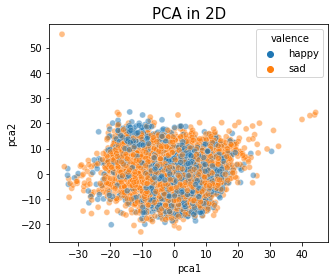

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

scaler = StandardScaler()
scaler.fit(feat.iloc[:,:518])
scaled_df = scaler.transform(feat.iloc[:,:518])

pca =PCA(2, random_state=42)
pca.fit(scaled_df)
df_pca = pca.transform(scaled_df)

df_graph = pd.DataFrame()
df_graph['pca1'] = df_pca[:,0]
df_graph['pca2'] = df_pca[:,1]
df_graph['valence'] = feat['valence'].values

# plot scatter of PCA
plt.figure(figsize=(5,4))
sns.scatterplot(
    x="pca1", y="pca2",
    hue='valence',
    data=df_graph,
    legend="full",
    alpha=0.5
)

plt.title("PCA in 2D", fontsize= 15)
plt.show()

### Data Partitioning

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn import preprocessing


In [32]:
class_name = 'valence'
attributes = [col for col in feat.columns if col != class_name]
X = feat.drop('valence', axis=1)
y = feat[['valence']]

# encoding labels
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

/Users/samuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [34]:
#convert data into numpy.ndarray (not normalized data are used in the decision tree and random forest as they are not
                                  # sensible to values of different ranges)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# normalize the data (for svm classifier and KNN)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [35]:
X_train.shape

(9190, 518)

# Basic Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
params_list = { 
                'max_depth': list(np.arange(4, 10)),
                'min_samples_split': [5,10, 15, 20, 30, 50],
                'min_samples_leaf': [5, 10, 15, 20, 30, 50],
                'criterion': ['gini', 'entropy'], 
             }

clf = DecisionTreeClassifier()
random_search = RandomizedSearchCV(clf, cv=3,  param_distributions=params_list, n_iter= 150,n_jobs=-1, verbose=True)
random_search.fit(X_train, y_train)

dt = random_search.best_estimator_   # dt:  decision tree

In [14]:
dt = DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=5, max_depth=5, criterion='gini') #remove when grid works
dt.fit(X_train, y_train)  


y_pred_dt = dt.predict(X_test)  # y_pred: prediction of decision tree

#print(f"best parameters:\n{random_search.best_params_}")      # remove when grid works
print('Accuracy %s' % accuracy_score(y_test, y_pred_dt))
print('F1-score %s' % f1_score(y_test, y_pred_dt, average=None))
print(classification_report(y_test, y_pred_dt))

Accuracy 0.6788525006346788
F1-score [0.63173217 0.71528247]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63      1622
           1       0.75      0.69      0.72      2317

    accuracy                           0.68      3939
   macro avg       0.67      0.68      0.67      3939
weighted avg       0.69      0.68      0.68      3939



# ENSEMBLE METHODS

# 1. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV

In [37]:
#help(RandomForestClassifier)

In [38]:
rf_10 = RandomForestClassifier(n_estimators=10, min_samples_split=20, min_samples_leaf=5, max_depth=5, criterion='gini')
rf_10.fit(X_train, y_train)  # rf: random forest classifier

y_pred_rf_10 = rf_10.predict(X_test)  #y_pred_rf: prediction random forest

print('Accuracy %s' % accuracy_score(y_test, y_pred_rf_10))
print('F1-score %s' % f1_score(y_test, y_pred_rf_10, average=None))
print(classification_report(y_test, y_pred_rf_10))

Accuracy 0.6973851231276974
F1-score [0.58057706 0.76330421]
              precision    recall  f1-score   support

           0       0.68      0.51      0.58      1622
           1       0.71      0.83      0.76      2317

    accuracy                           0.70      3939
   macro avg       0.69      0.67      0.67      3939
weighted avg       0.69      0.70      0.69      3939



In [42]:
rf_50 = RandomForestClassifier(n_estimators=50, min_samples_split=20, min_samples_leaf=5, max_depth=5, criterion='gini') #base class :100
rf_50.fit(X_train, y_train)  # rf: random forest classifier

y_pred_rf50 = rf_50.predict(X_test)  #y_pred_rf: prediction random forest

print('Accuracy %s' % accuracy_score(y_test, y_pred_rf50))
print('F1-score %s' % f1_score(y_test, y_pred_rf50, average=None))
print(classification_report(y_test, y_pred_rf50))

Accuracy 0.7105864432597105
F1-score [0.59631728 0.77443609]
              precision    recall  f1-score   support

           0       0.70      0.52      0.60      1622
           1       0.72      0.84      0.77      2317

    accuracy                           0.71      3939
   macro avg       0.71      0.68      0.69      3939
weighted avg       0.71      0.71      0.70      3939



In [39]:
rf_100 = RandomForestClassifier(min_samples_split=20, min_samples_leaf=5, max_depth=5, criterion='gini') #base class :100
rf_100.fit(X_train, y_train)  # rf: random forest classifier

y_pred_rf_100 = rf_100.predict(X_test)  #y_pred_rf: prediction random forest

print('Accuracy %s' % accuracy_score(y_test, y_pred_rf_100))
print('F1-score %s' % f1_score(y_test, y_pred_rf_100, average=None))
print(classification_report(y_test, y_pred_rf_100))

Accuracy 0.7113480578827114
F1-score [0.59378349 0.77613703]
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      1622
           1       0.71      0.85      0.78      2317

    accuracy                           0.71      3939
   macro avg       0.71      0.68      0.68      3939
weighted avg       0.71      0.71      0.70      3939



### How does the number of base classifiers affect the performances?

In [40]:
rf_200 = RandomForestClassifier(n_estimators=200, min_samples_split=20, min_samples_leaf=5, max_depth=5, criterion='gini') #base class :100
rf_200.fit(X_train, y_train)  # rf: random forest classifier

y_pred_rf200 = rf_200.predict(X_test)  #y_pred_rf: prediction random forest

print('Accuracy %s' % accuracy_score(y_test, y_pred_rf200))
print('F1-score %s' % f1_score(y_test, y_pred_rf200, average=None))
print(classification_report(y_test, y_pred_rf200))

Accuracy 0.7077938563087078
F1-score [0.58492607 0.77453477]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58      1622
           1       0.71      0.85      0.77      2317

    accuracy                           0.71      3939
   macro avg       0.71      0.68      0.68      3939
weighted avg       0.71      0.71      0.70      3939



Increasing the number of base classifiers from 100 to 200 increase the accuracy and recall of the class happy songs

In [41]:
rf_400 = RandomForestClassifier(n_estimators=400, min_samples_split=20, min_samples_leaf=5, max_depth=5, criterion='gini') #base class :100
rf_400.fit(X_train, y_train)  # rf: random forest classifier

y_pred_rf400 = rf_400.predict(X_test)  #y_pred_rf: prediction random forest

print('Accuracy %s' % accuracy_score(y_test, y_pred_rf400))
print('F1-score %s' % f1_score(y_test, y_pred_rf400, average=None))
print(classification_report(y_test, y_pred_rf400))

Accuracy 0.7110941863417111
F1-score [0.59357143 0.77589602]
              precision    recall  f1-score   support

           0       0.71      0.51      0.59      1622
           1       0.71      0.85      0.78      2317

    accuracy                           0.71      3939
   macro avg       0.71      0.68      0.68      3939
weighted avg       0.71      0.71      0.70      3939



Increasing the number of classifier from 200 to 400 didn't improve the performance 

After 200 base classifiers no improvement in the performances. <br>
The optimal number of base estimator is 200.

### ROC-AUC for different estimators

In [22]:
##### COMPUTING PROBABILITIES FOR ROC CURVES ########

# all data
y_score_50 = rf_50.predict_proba(X_test)
fpr1, tpr1, _ = roc_curve(y_test, y_score_50[:, 1])
roc_auc_50 = auc(fpr1, tpr1)

# quarter
y_score_100 = rf_100.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score_100[:, 1])
roc_auc_100 = auc(fpr2, tpr2)

# half 
y_score_200 = rf_200.predict_proba(X_test)
fpr3, tpr3, _ = roc_curve(y_test, y_score_200[:, 1])
roc_auc_200 = auc(fpr3, tpr3)

# threequarters
y_score_400 = rf_400.predict_proba(X_test)
fpr4, tpr4, _ = roc_curve(y_test, y_score_400[:, 1])
roc_auc_400 = auc(fpr4, tpr4)

#hundred entries 
y_score_10 = rf_10.predict_proba(X_test)
fpr5, tpr5, _ = roc_curve(y_test, y_score_10[:, 1])
roc_auc_10 = auc(fpr5, tpr5)

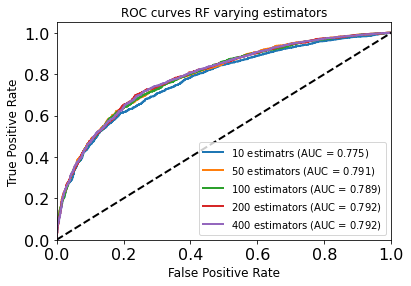

In [25]:
plt.figure(figsize=(6,4))

# 10 estimators
plt.plot(fpr5, tpr5, lw=2, label='10 estimatrs$\;$(AUC = %.3f)' % roc_auc_10)
# 50 estimators
plt.plot(fpr1, tpr1, lw=2, label='50 estimators$\;$(AUC = %.3f)' % roc_auc_50)
# 100 estimators
plt.plot(fpr2, tpr2, lw=2, label='100 estimators$\;$(AUC = %.3f)' % roc_auc_100)
# 200 estimators
plt.plot(fpr3, tpr3, lw=2, label='200 estimators$\;$(AUC = %.3f)' % roc_auc_200)
# 400 estimators
plt.plot(fpr4, tpr4, lw=2, label='400 estimators$\;$(AUC = %.3f)' % roc_auc_400)


plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curves RF varying estimators', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

#### Feature Importance of Random Forest

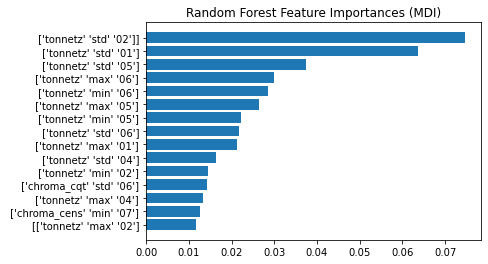

In [91]:
nbr_features = 15
tree_feature_importances = rf_100.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]
y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, str(np.array(attributes)[sorted_idx]).split('\n'))
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [92]:
from sklearn.inspection import permutation_importance

In [94]:
result = permutation_importance(rf_100, X_test, y_test, n_repeats=10, random_state=42)

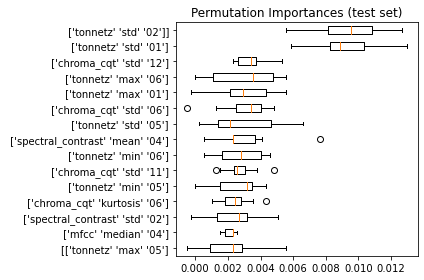

In [95]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=str(np.array(attributes)[sorted_idx]).split('\n'))
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [96]:
import pydotplus
from sklearn import tree
from IPython.display import Image

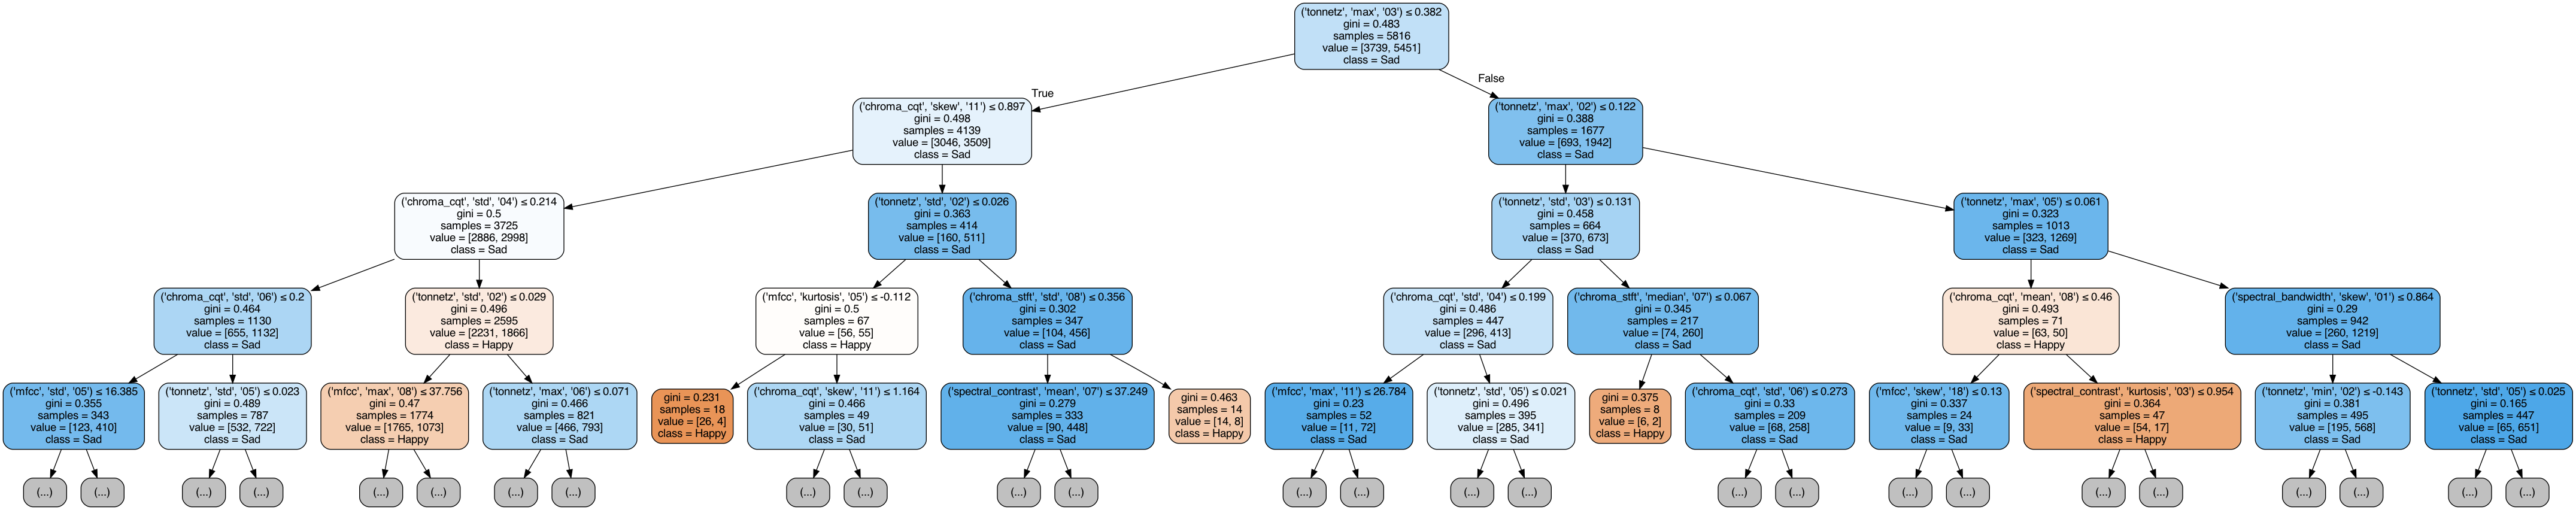

In [98]:
dot_data = tree.export_graphviz(rf_100.estimators_[0], out_file=None,  
                                feature_names=attributes, 
                                class_names=['Happy', 'Sad'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### ROC-AUC

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

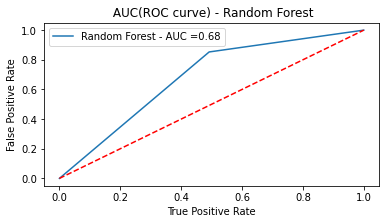

In [102]:
plt.figure(figsize=(6,3))
plot_roc_curve(y_test, y_pred_rf_100, 'Random Forest')

### Confusion Matrix

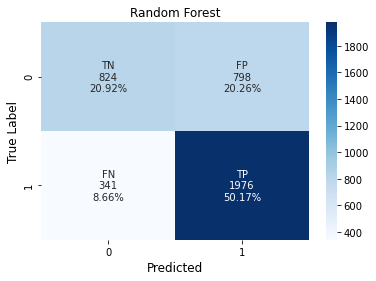

In [103]:
cf_matrix = confusion_matrix(y_test, y_pred_rf_100)
plt.figure(figsize=(6,4))
make_confusion_matrix(cf_matrix, 'Random Forest')

# 2. Bagging

In [43]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

### DecisionTree Bagging 

Improving the performances of the single Decision Tree with Bagging.

In [44]:
base_estimator = DecisionTreeClassifier( min_samples_split= 20, min_samples_leaf= 5, max_depth= 5, criterion= 'gini')
bg = BaggingClassifier(base_estimator=base_estimator, n_estimators=200, random_state=42) #bg: bagging
bg.fit(X_train, y_train)

y_pred_bg = bg.predict(X_test)  #y_pred_bg: prediction bagging

print('Accuracy %s' % accuracy_score(y_test, y_pred_bg))
print('F1-score %s' % f1_score(y_test, y_pred_bg, average=None))
print(classification_report(y_test, y_pred_bg))

Accuracy 0.7169332317847169
F1-score [0.62993694 0.77081192]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      1622
           1       0.74      0.81      0.77      2317

    accuracy                           0.72      3939
   macro avg       0.71      0.70      0.70      3939
weighted avg       0.71      0.72      0.71      3939



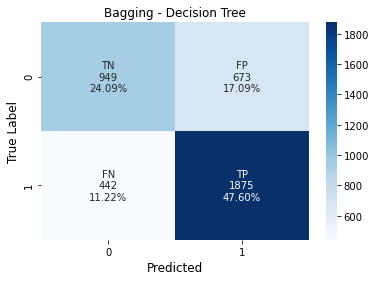

In [114]:
cf_matrix = confusion_matrix(y_test, y_pred_bg)
plt.figure(figsize=(6,4))
make_confusion_matrix(cf_matrix, 'Bagging - Decision Tree')

# 3. Adaboost 

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
help(AdaBoostClassifier)

In [46]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=200, random_state=42)  #ada: adaboost classifier
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)  # y_pred_ada: prediction adaboost

print('Accuracy %s' % accuracy_score(y_test, y_pred_ada))
print('F1-score %s' % f1_score(y_test, y_pred_ada, average=None))
print(classification_report(y_test, y_pred_ada))

Accuracy 0.7331810104087332
F1-score [0.67451223 0.77392988]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1622
           1       0.77      0.78      0.77      2317

    accuracy                           0.73      3939
   macro avg       0.72      0.72      0.72      3939
weighted avg       0.73      0.73      0.73      3939



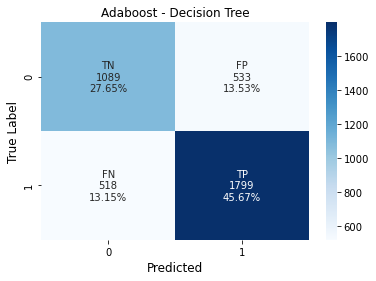

In [117]:
cf_matrix = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(6,4))
make_confusion_matrix(cf_matrix, 'Adaboost - Decision Tree')

# Comparing ROC curves Ensemble methods

In [47]:
##### COMPUTING PROBABILITIES FOR ROC CURVES ########

# simple decision tree
y_score_dt = dt.predict_proba(X_test)
fpr1, tpr1, _ = roc_curve(y_test, y_score_dt[:, 1])
roc_auc_dt = auc(fpr1, tpr1)

# random forest
y_score_rf = rf_100.predict_proba(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_score_rf[:, 1])
roc_auc_rf = auc(fpr2, tpr2)

# bagging 
y_score_bg = bg.predict_proba(X_test)
fpr3, tpr3, _ = roc_curve(y_test, y_score_bg[:, 1])
roc_auc_bg = auc(fpr3, tpr3)

# adaboost
y_score_ada = ada.predict_proba(X_test)
fpr4, tpr4, _ = roc_curve(y_test, y_score_ada[:, 1])
roc_auc_ada = auc(fpr4, tpr4)

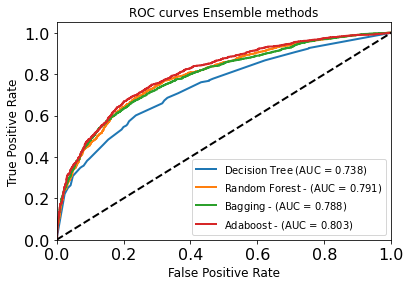

In [48]:
plt.figure(figsize=(6,4))

# decision tree
plt.plot(fpr1, tpr1, lw=2, label='Decision Tree$\;$(AUC = %.3f)' % roc_auc_dt)
# random forest
plt.plot(fpr2, tpr2, lw=2, label='Random Forest$\;$- (AUC = %.3f)' % roc_auc_rf)
# bagging 
plt.plot(fpr3, tpr3, lw=2, label='Bagging$\;$- (AUC = %.3f)' % roc_auc_bg)
# adaboost
plt.plot(fpr4, tpr4, lw=2, label='Adaboost$\;$- (AUC = %.3f)' % roc_auc_ada)


plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curves Ensemble methods', fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

We can observe that the best ensemble technique is Adaboost which increased the AUC score from 0.738 to 0.803. 
In terms of accuracy, Adaboost reached 0.73, while Random Forest 0.71, Bagging 0.72 and Decision Tree 0.68

# Voting Classifier 
##### KNN Classifier (quick test)

In [121]:
from sklearn.neighbors import KNeighborsClassifier
#help(KNeighborsClassifier)

In [122]:
pca = PCA(146, random_state=42)
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)


In [123]:
#parameters to tune
n_neighbors = list(range(3,20))
metric = ['euclidean', 'manhattan']
hyperparameters = dict(metric = metric, n_neighbors=n_neighbors)

In [124]:
"""knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, hyperparameters, cv=5, verbose=True)
random_search.fit(X_train_norm, y_train)
print(f"best parameters:\n{clf.best_params_}\naccuracy: {clf.best_score_}")"""

'knn = KNeighborsClassifier()\nrandom_search = RandomizedSearchCV(knn, hyperparameters, cv=5, verbose=True)\nrandom_search.fit(X_train_norm, y_train)\nprint(f"best parameters:\n{clf.best_params_}\naccuracy: {clf.best_score_}")'

### KNN (PCA)

In [125]:
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean', weights='distance')  #knn : K-Nearest Neighbor
knn.fit(X_train_pca, y_train)

y_pred_knn = knn.predict(X_test_pca)  #y_pred_knn: prediction knn

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn))
print('F1-score %s' % f1_score(y_test, y_pred_knn, average=None))
print(classification_report(y_test, y_pred_knn))

Accuracy 0.6686976389946687
F1-score [0.65172138 0.68409586]
              precision    recall  f1-score   support

           0       0.57      0.75      0.65      1622
           1       0.78      0.61      0.68      2317

    accuracy                           0.67      3939
   macro avg       0.68      0.68      0.67      3939
weighted avg       0.69      0.67      0.67      3939



### KNN

In [126]:
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean', weights='distance')  #knn : K-Nearest Neighbor
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)  #y_pred_knn: prediction knn

print('Accuracy %s' % accuracy_score(y_test, y_pred_knn))
print('F1-score %s' % f1_score(y_test, y_pred_knn, average=None))
print(classification_report(y_test, y_pred_knn))

Accuracy 0.5996445798425997
F1-score [0.49984142 0.66624339]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50      1622
           1       0.65      0.68      0.67      2317

    accuracy                           0.60      3939
   macro avg       0.58      0.58      0.58      3939
weighted avg       0.60      0.60      0.60      3939



### Notes on models selection. Why not using KNN in the ensemble
The performances of KNN are poor in higher dimiension. Here we are working with 518 features.<br>
After some experimental run, we noticed that the accuracy of KNN on a fully dimensional dataset is close to 0.67 whereas if we use a PCA projection instead, reduced down to 146 principal components (90% variance explained) we are able to get a 74% accuracy.<br>
However in a Majority Voting classifier we cannot use different dataset. <br> Since we will pass the X_train (with full dimensionality), including KNN (knowing its performances are poor) would just have a negative impact on the performances of the ensemble.<br>

## Setup voting classifier : Ensemble of different models

- SVM
- Random Forest
- MLP

In [127]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [67]:
help(VotingClassifier)

Help on class VotingClassifier in module sklearn.ensemble._voting:

class VotingClassifier(sklearn.base.ClassifierMixin, _BaseVoting)
 |  VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
 |  
 |  Soft Voting/Majority Rule classifier for unfitted estimators.
 |  
 |  Read more in the :ref:`User Guide <voting_classifier>`.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Parameters
 |  ----------
 |  estimators : list of (str, estimator) tuples
 |      Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
 |      of those original estimators that will be stored in the class attribute
 |      ``self.estimators_``. An estimator can be set to ``'drop'``
 |      using ``set_params``.
 |  
 |      .. versionchanged:: 0.21
 |          ``'drop'`` is accepted. Using None was deprecated in 0.22 and
 |          support was removed in 0.24.
 |  
 |  voting : {'hard', 'soft'}, default='hard'
 |      If 'hard', uses predicted c

In [161]:
# TEAM OF MODELS

#knn
#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')   # doesn't work well in high dim

#adaboost
ada = AdaBoostClassifier(base_estimator=None, n_estimators=200, random_state=42)  #ada: adaboost classifier

#svm
svm = SVC(kernel='rbf', C=1.419617535998578, random_state=42)

#random forest
rf = RandomForestClassifier(min_samples_split=20, min_samples_leaf=5,n_estimators= 200, max_depth=5, criterion='gini')

#neural network 
mlp = MLPClassifier(hidden_layer_sizes=(60,20), alpha=0.11744317773833411,
                    learning_rate='adaptive', solver='sgd', activation='relu', random_state=42, max_iter=600)

In [171]:
voting_clf = VotingClassifier(estimators=[('ada',ada),('svm', svm), ('rf', rf), ('mlp', mlp)], voting ='hard')

voting_clf.fit(X_train_norm, y_train)
voting_pred = voting_clf.predict(X_test_norm)

print('Accuracy %s' % accuracy_score(y_test, voting_pred))
print('F1-score %s' % f1_score(y_test, voting_pred, average=None))
print(classification_report(y_test, voting_pred))

Accuracy 0.7725310992637725
F1-score [0.727162 0.804963]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1622
           1       0.81      0.80      0.80      2317

    accuracy                           0.77      3939
   macro avg       0.77      0.77      0.77      3939
weighted avg       0.77      0.77      0.77      3939



The ensemble of the best three classifier didn't improve much the performances. This is probably due to the fact that the classifier involved in the voting are not so many.

## Confusion Matrix

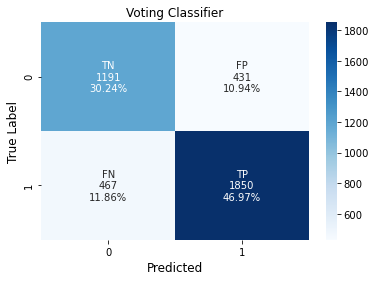

In [164]:
cf_matrix = confusion_matrix(y_test, voting_pred)
plt.figure(figsize=(6,4))
make_confusion_matrix(cf_matrix, 'Voting Classifier')

### ROC-AUC

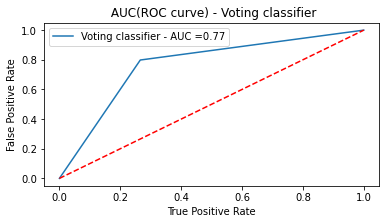

In [165]:

plt.figure(figsize=(6,3))
plot_roc_curve(y_test, voting_pred, 'Voting classifier')

In [168]:
##### COMPUTING PROBABILITIES FOR ROC CURVES ########
#voting 
y_score_voting = voting_clf.predict_proba(X_test)
fpr5, tpr5, _ = roc_curve(y_test, y_score_voting[:, 1])
roc_auc_voting = auc(fpr5, tpr5)

AttributeError: predict_proba is not available when voting='hard'

NameError: name 'roc_auc_voting' is not defined

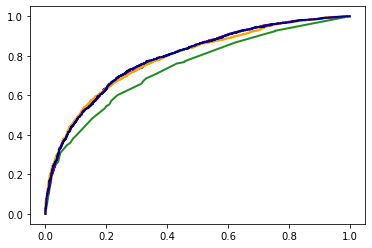

In [167]:
plt.figure(figsize=(6,4))

# decision tree
plt.plot(fpr1, tpr1, color='forestgreen', lw=2, label='Decision Tree$\;$(AUC = %.3f)' % roc_auc_dt)
# random forest
plt.plot(fpr2, tpr2, color='purple', lw=2, label='Random Forest$\;$- (AUC = %.3f)' % roc_auc_rf)
# bagging 
plt.plot(fpr3, tpr3, color='orange', lw=2, label='Bagging$\;$- (AUC = %.3f)' % roc_auc_bg)
# adaboost
plt.plot(fpr4, tpr4, color='darkblue', lw=2, label='Adaboost$\;$- (AUC = %.3f)' % roc_auc_ada)
# adaboost
plt.plot(fpr5, tpr5, color='yellow', lw=2, label='Adaboost$\;$- (AUC = %.3f)' % roc_auc_voting)


plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC curves Ensemble methods', fontsize=12)
plt.legend(loc="lower right", fontsize=10, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()